<a href="https://colab.research.google.com/github/ninayang2019/Machine-Learning/blob/master/All_pilots_attributes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## **EDA**

**Distribution of Age**

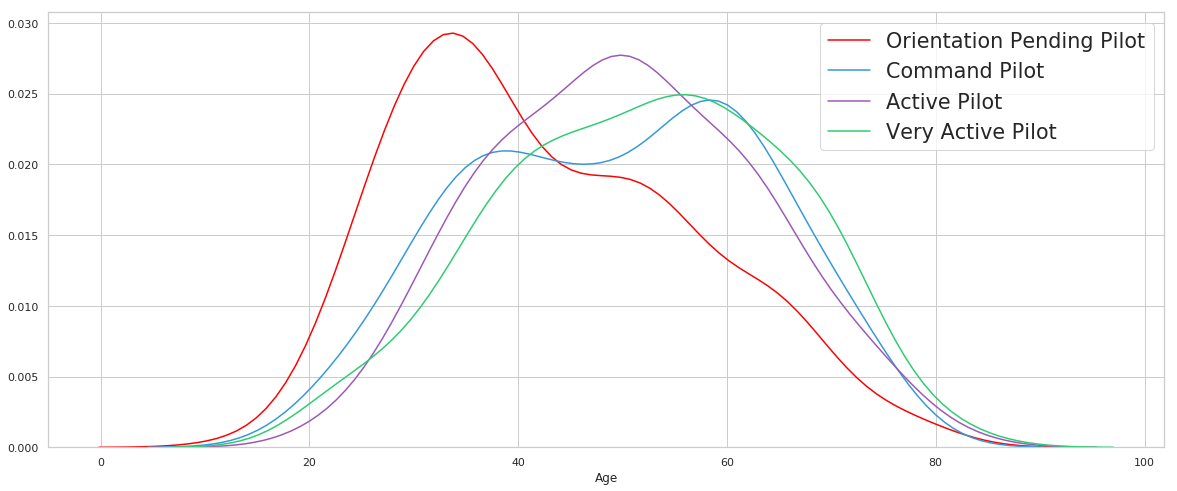

In [0]:
plt.subplots(figsize =(20, 8)) 
sns.distplot(OP['Age'] , color='red', label='Orientation Pending Pilot', hist=False)
sns.distplot(CP['Age'].dropna(), color='#3498db', label='Command Pilot', hist=False)
sns.distplot(AP['Age'].dropna(), color='#9b59b6', label='Active Pilot', hist=False)
sns.distplot(VAP['Age'].dropna(), color='#2ecc71', label='Very Active Pilot', hist=False)

plt.legend(fontsize='xx-large')

**Distribution of Total Hours**

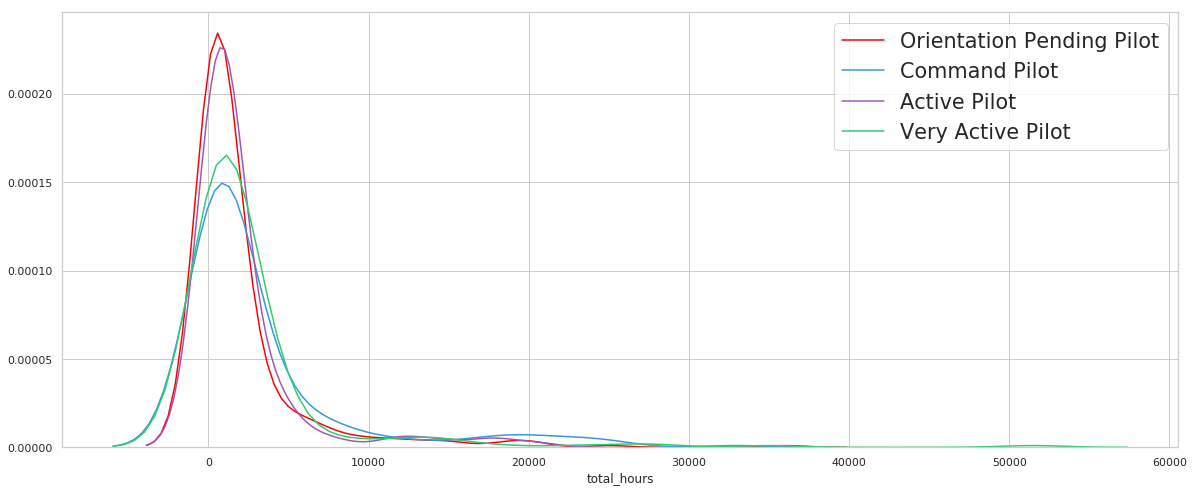

In [0]:
plt.subplots(figsize =(20, 8)) 
sns.distplot(OP['total_hours'] , color='red', label='Orientation Pending Pilot', hist=False)
sns.distplot(CP['total_hours'].dropna(), color='#3498db', label='Command Pilot', hist=False)
sns.distplot(AP['total_hours'].dropna(), color='#9b59b6', label='Active Pilot', hist=False)
sns.distplot(VAP['total_hours'].dropna(), color='#2ecc71', label='Very Active Pilot', hist=False)

plt.legend(fontsize='xx-large')

## **Data cleaning**

**Loading data**

In [0]:
df = pd.read_csv('/content/drive/Team Drives/AFW(Internal)/10.Supply Enhancement/04. All_Pilot/All_pilots_attributes_with_labels.csv')
df.head()

,pilot_id,member_id,join_date,join_year,oriented_date,active,own,flight_status,co_pilot,date_of_birth,Age,total_hours,license_type,ifr,multi_engine,pilot_id.1,activity_level
0,9733,9215,2016-01-11,3,2016-01-31 00:00:00,0,1.0,Command Pilot,0,1971-07-01,47.0,307.0,Private,1,0,9733,2
1,9720,9202,2016-01-04,3,2016-05-12 00:00:00,0,NaN,Command Pilot,0,1954-01-01,65.0,620.0,Commercial,1,1,9720,2
2,9787,9266,2016-02-24,3,2016-04-19 00:00:00,1,NaN,Command Pilot,0,1986-11-01,32.0,1180.0,ATP,1,1,9787,2
3,9849,9328,2016-04-04,3,2016-04-18 00:00:00,1,1.0,Command Pilot,0,1967-09-01,51.0,530.0,Commercial,0,1,9849,2
4,9917,9395,2016-05-04,3,2016-05-13 00:00:00,1,1.0,Command Pilot,0,1955-04-01,64.0,1400.0,Private,1,0,9917,2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 17 columns):
pilot_id          865 non-null int64
member_id         865 non-null int64
join_date         865 non-null object
join_year         865 non-null int64
oriented_date     533 non-null object
active            865 non-null int64
own               550 non-null float64
flight_status     865 non-null object
co_pilot          865 non-null int64
date_of_birth     863 non-null object
Age               863 non-null float64
total_hours       863 non-null float64
license_type      860 non-null object
ifr               865 non-null int64
multi_engine      865 non-null int64
pilot_id.1        865 non-null int64
activity_level    865 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 115.0+ KB


In [0]:
#drop_list=['join_date','date_of_birth', 'transplant', 'active','Join_orientated','date_of_birth','mop_active_status','hseats','profile_preferred_passengers','profile_max_passengers','profile_preferred_weight','profile_preferred_weight','profile_max_weight','profile_preferred_distance','profile_max_distance','profile_stops_preference','profile_medical_preference','profile_compassion_preference','profile_camps_preference','profile_veterans_preference','profile_children_preference','Access','Login']
#df=df.drop(drop_list,axis='columns')

**Fill NA with 0**

In [0]:
#df['mission_flown'] = df['mission_flown'].fillna(0)
df['own'] = df['own'].fillna(0)
#df['orientated_first_mission'] = df['orientated_first_mission'].fillna(0)
#df['Join_orientated'] = df['Join_orientated'].fillna(0)
df.head()

,pilot_id,member_id,join_date,join_year,oriented_date,active,own,flight_status,co_pilot,date_of_birth,Age,total_hours,license_type,ifr,multi_engine,pilot_id.1,activity_level
0,9733,9215,2016-01-11,3,2016-01-31 00:00:00,0,1.0,Command Pilot,0,1971-07-01,47.0,307.0,Private,1,0,9733,2
1,9720,9202,2016-01-04,3,2016-05-12 00:00:00,0,0.0,Command Pilot,0,1954-01-01,65.0,620.0,Commercial,1,1,9720,2
2,9787,9266,2016-02-24,3,2016-04-19 00:00:00,1,0.0,Command Pilot,0,1986-11-01,32.0,1180.0,ATP,1,1,9787,2
3,9849,9328,2016-04-04,3,2016-04-18 00:00:00,1,1.0,Command Pilot,0,1967-09-01,51.0,530.0,Commercial,0,1,9849,2
4,9917,9395,2016-05-04,3,2016-05-13 00:00:00,1,1.0,Command Pilot,0,1955-04-01,64.0,1400.0,Private,1,0,9917,2


**Define acitve pilot**

In [0]:
# df.loc[df.mission_flown == 0, 'active_pilot'] = 0 
# df.loc[df.mission_flown > 0, 'active_pilot'] = 1
# df.head()

,pilot_id,mission_flown,member_id,join_date,join_year,oriented_date,first_mission,active,own,flight_status,co_pilot,date_of_birth,Age,total_hours,license_type,ifr,multi_engine,Join_orientated,orientated_first_mission,hseats,transplant,active_pilot
0,9717,0.0,9199,2016-01-04,3,2016-04-26 00:00:00,NaN,1,0.0,Command Pilot,0,1959-04-01,60.0,685.0,Commercial,1,0,113.0,NaN,NaN,NaN,0.0
1,9718,1.0,9200,2016-01-04,3,2016-02-05 00:00:00,2016-06-14 00:00:00,1,1.0,Command Pilot,1,1967-09-26,51.0,800.0,Commercial,1,1,32.0,130.0,NaN,NaN,1.0
2,9720,1.0,9202,2016-01-04,3,2016-05-12 00:00:00,2016-06-03 00:00:00,0,0.0,Command Pilot,0,1954-01-01,65.0,620.0,Commercial,1,1,129.0,22.0,NaN,NaN,1.0
3,9722,0.0,9204,2016-01-05,3,2016-04-19 00:00:00,NaN,1,0.0,Command Pilot,1,1962-12-04,56.0,10890.0,ATP,1,1,105.0,NaN,NaN,NaN,0.0
4,9724,7.0,9206,2016-01-07,3,2017-05-11 00:00:00,2017-06-10 00:00:00,1,1.0,Command Pilot,0,1971-07-01,47.0,550.0,Private,1,0,490.0,30.0,NaN,NaN,1.0


**Convert license_type to numerical value**

In [0]:
df.loc[df.license_type == 'ATP', 'license'] = 2 
df.loc[df.license_type == 'Commercial', 'license'] = 1
df.loc[df.license_type == 'Private', 'license'] = 0
df.head()

,pilot_id,member_id,join_date,join_year,oriented_date,active,own,flight_status,co_pilot,date_of_birth,Age,total_hours,license_type,ifr,multi_engine,pilot_id.1,activity_level,license
0,9733,9215,2016-01-11,3,2016-01-31 00:00:00,0,1.0,Command Pilot,0,1971-07-01,47.0,307.0,Private,1,0,9733,2,0.0
1,9720,9202,2016-01-04,3,2016-05-12 00:00:00,0,0.0,Command Pilot,0,1954-01-01,65.0,620.0,Commercial,1,1,9720,2,1.0
2,9787,9266,2016-02-24,3,2016-04-19 00:00:00,1,0.0,Command Pilot,0,1986-11-01,32.0,1180.0,ATP,1,1,9787,2,2.0
3,9849,9328,2016-04-04,3,2016-04-18 00:00:00,1,1.0,Command Pilot,0,1967-09-01,51.0,530.0,Commercial,0,1,9849,2,1.0
4,9917,9395,2016-05-04,3,2016-05-13 00:00:00,1,1.0,Command Pilot,0,1955-04-01,64.0,1400.0,Private,1,0,9917,2,0.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 18 columns):
pilot_id          865 non-null int64
member_id         865 non-null int64
join_date         865 non-null object
join_year         865 non-null int64
oriented_date     533 non-null object
active            865 non-null int64
own               865 non-null float64
flight_status     865 non-null object
co_pilot          865 non-null int64
date_of_birth     863 non-null object
Age               863 non-null float64
total_hours       863 non-null float64
license_type      860 non-null object
ifr               865 non-null int64
multi_engine      865 non-null int64
pilot_id.1        865 non-null int64
activity_level    865 non-null int64
license           860 non-null float64
dtypes: float64(4), int64(9), object(5)
memory usage: 121.7+ KB


In [0]:
df.to_csv('/content/drive/Team Drives/AFW(Internal)/10.Supply Enhancement/02. CP_vs_AP/CP_vs_AP_cleaned.csv')

**Drop null value**

In [0]:
df.dropna(inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 23 columns):
pilot_id                    0 non-null int64
mission_flown               0 non-null float64
member_id                   0 non-null int64
join_date                   0 non-null object
join_year                   0 non-null int64
oriented_date               0 non-null object
first_mission               0 non-null object
active                      0 non-null int64
own                         0 non-null float64
flight_status               0 non-null object
co_pilot                    0 non-null int64
date_of_birth               0 non-null object
Age                         0 non-null float64
total_hours                 0 non-null float64
license_type                0 non-null object
ifr                         0 non-null int64
multi_engine                0 non-null int64
Join_orientated             0 non-null float64
orientated_first_mission    0 non-null float64
hseats                      0 non-

##**AP LT analysis**

In [0]:
ap = df[df['active_pilot'] == 1]

In [0]:
ap.head()

,pilot_id,mission_flown,member_id,join_date,join_year,oriented_date,first_mission,active,own,flight_status,co_pilot,date_of_birth,Age,total_hours,license_type,ifr,multi_engine,Join_orientated,orientated_first_mission,hseats,transplant,active_pilot,license
1,9718,1.0,9200,2016-01-04,3,2016-02-05 00:00:00,2016-06-14 00:00:00,1,1.0,Command Pilot,1,1967-09-26,51.0,800.0,Commercial,1,1,32.0,130.0,NaN,NaN,1.0,1.0
2,9720,1.0,9202,2016-01-04,3,2016-05-12 00:00:00,2016-06-03 00:00:00,0,0.0,Command Pilot,0,1954-01-01,65.0,620.0,Commercial,1,1,129.0,22.0,NaN,NaN,1.0,1.0
4,9724,7.0,9206,2016-01-07,3,2017-05-11 00:00:00,2017-06-10 00:00:00,1,1.0,Command Pilot,0,1971-07-01,47.0,550.0,Private,1,0,490.0,30.0,NaN,NaN,1.0,0.0
5,9731,8.0,9213,2016-01-11,3,2016-03-09 00:00:00,2017-04-28 00:00:00,1,1.0,Command Pilot,0,1944-12-16,74.0,2681.0,Private,1,0,58.0,415.0,NaN,NaN,1.0,0.0
6,9733,3.0,9215,2016-01-11,3,2016-01-31 00:00:00,2016-04-03 00:00:00,0,1.0,Command Pilot,0,1971-07-01,47.0,307.0,Private,1,0,20.0,63.0,NaN,NaN,1.0,0.0


In [0]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 1 to 562
Data columns (total 23 columns):
pilot_id                    341 non-null int64
mission_flown               341 non-null float64
member_id                   341 non-null int64
join_date                   341 non-null object
join_year                   341 non-null int64
oriented_date               339 non-null object
first_mission               341 non-null object
active                      341 non-null int64
own                         341 non-null float64
flight_status               341 non-null object
co_pilot                    341 non-null int64
date_of_birth               340 non-null object
Age                         340 non-null float64
total_hours                 340 non-null float64
license_type                341 non-null object
ifr                         341 non-null int64
multi_engine                341 non-null int64
Join_orientated             339 non-null float64
orientated_first_mission    339 n

In [0]:
ap['Join_orientated'].describe()

count     339.000000
mean       64.345133
std       146.057728
min         0.000000
25%         5.000000
50%        13.000000
75%        48.000000
max      1078.000000
Name: Join_orientated, dtype: float64

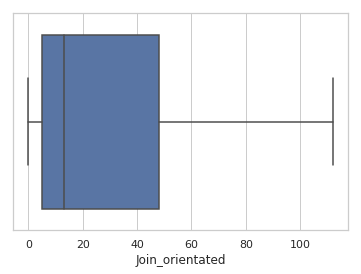

In [0]:
sns.boxplot(ap['Join_orientated'], showfliers = False)

In [0]:
ap['orientated_first_mission'].describe()

count    339.000000
mean      72.141593
std      122.052336
min       -6.000000
25%       10.000000
50%       24.000000
75%       71.000000
max      904.000000
Name: orientated_first_mission, dtype: float64

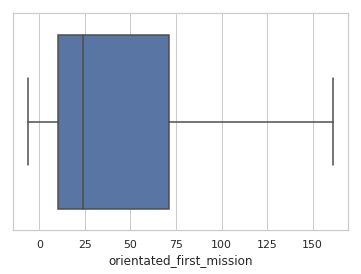

In [0]:
sns.boxplot(ap['orientated_first_mission'], showfliers = False)

In [0]:
ap.to_csv('/content/drive/Team Drives/AFW(Internal)/10.Supply Enhancement/02. CP_vs_AP/ap.csv')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


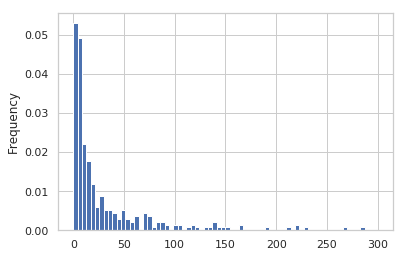

In [0]:
ap['Join_orientated'].plot(kind='hist', normed=True, range=(0,300), bins=70)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


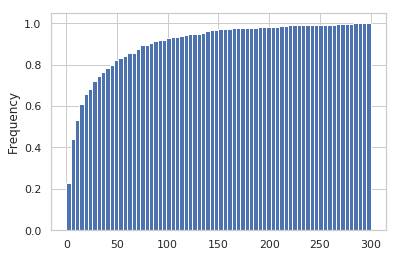

In [0]:
ap['Join_orientated'].plot(kind='hist', normed=True, cumulative=True, range=(0,300), bins=70)

In [0]:
OP=df[df['activity_level']==0]
CP=df[df['activity_level']==1]
AP=df[df['activity_level']==2]
VAP=df[df['activity_level']==3]

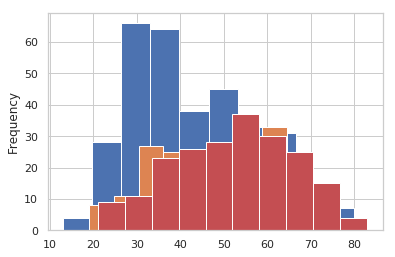

In [0]:
OP['Age'].plot(kind='hist')
CP['Age'].plot(kind='hist')
AP['Age'].plot(kind='hist')
VAP['Age'].plot(kind='hist')



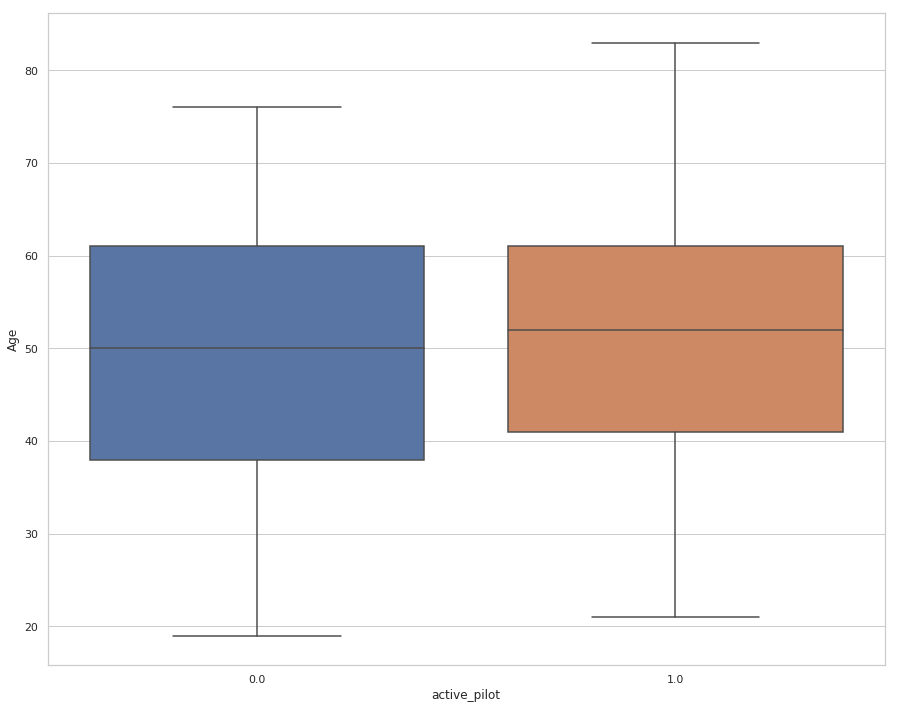

In [0]:
plt.subplots(figsize =(15, 12))
sns.boxplot(x = 'active_pilot', y = 'Age', data=df, showfliers=False)

In [0]:
AP['total_hours'].mean()

2503.9882352941177

In [0]:
CP['total_hours'].mean()

3224.4088888888887

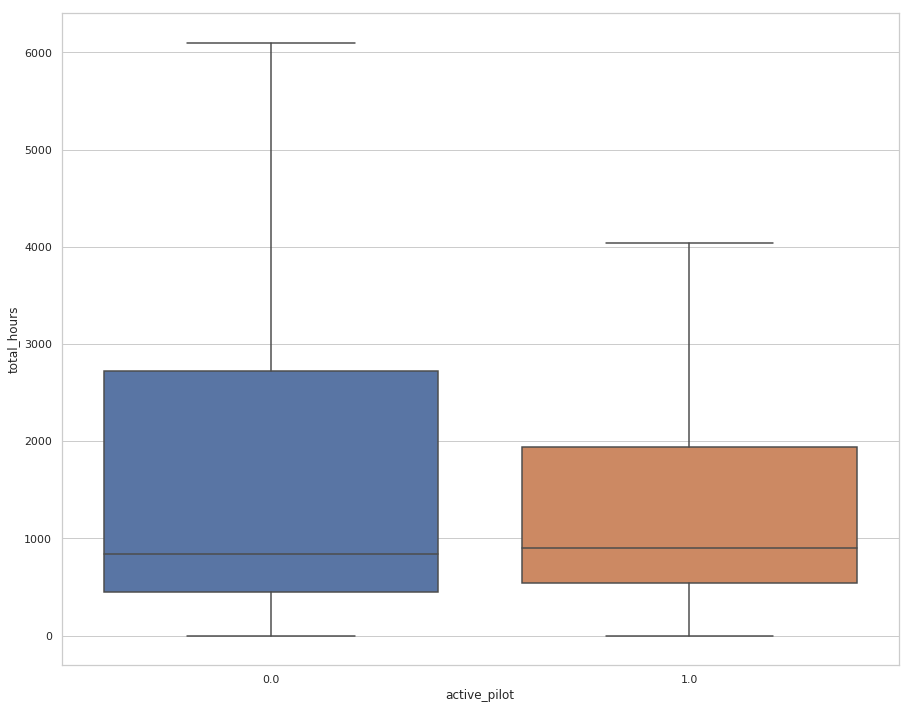

In [0]:
plt.subplots(figsize =(15, 12)) 
sns.boxplot(x = 'active_pilot', y = 'total_hours', data=df, showfliers=False)

## **Modeling**

In [0]:
df['Age'] = df['Age'].apply(lambda x: int(x))

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
bins_age = (0,20,35,55,80,200)
group_names_age = [ 'young','middle','before','after','senior']
df['age_bin'] = pd.cut(df['Age'], bins = bins_age, labels=group_names_age)
label_quality = LabelEncoder()
#df['age_bin'] = label_quality.fit_transform(df['age_bin'])
df['age_bin'].value_counts()

after     1066
before     543
senior     107
middle      43
young        5
Name: age_bin, dtype: int64

In [0]:
df.loc[df.age_bin == 'young', 'age_bin_num'] = 0
df.loc[df.age_bin == 'middle', 'age_bin_num'] = 1
df.loc[df.age_bin == 'before', 'age_bin_num'] = 2
df.loc[df.age_bin == 'after', 'age_bin_num'] = 3
df.loc[df.age_bin == 'senior', 'age_bin_num'] = 4

In [0]:
bins_hours = (0,250,500,5000,10000)
group_names_hours = ['250','500','5000','12000']
df['total_hours_bin'] = pd.cut(df['total_hours'], bins = bins_hours, labels = group_names_hours)
label_quality = LabelEncoder()
df['total_hours_bin'] = label_quality.fit_transform(df['total_hours_bin'].astype(str))
df['total_hours_bin'].value_counts()

3    1251
2     252
0     129
4     109
1      24
Name: total_hours_bin, dtype: int64

**Train test data split**

In [0]:
#Define y veriable as target
y=['active_pilot']

#Define x variables##remove SibSp based on the correlation
x=['age_bin_num','co_pilot','total_hours_bin','license','ifr','multi_engine','own']


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df[x],df[y], test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1412, 7) (1412, 1)
(353, 7) (353, 1)


**Logit regression without bins**

In [0]:
import statsmodels.api as sm

cols_bin = ['co_pilot','Age', 'total_hours', 'license','ifr', 'multi_engine','own']
X_bin = df[cols_bin]

logit_model=sm.Logit(df['active_pilot'],X_bin)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.538667
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: active_pilot     Pseudo R-squared: 0.027    
Date:               2019-02-25 23:28 AIC:              1914.4179
No. Observations:   1764             BIC:              1952.7453
Df Model:           6                Log-Likelihood:   -950.21  
Df Residuals:       1757             LL-Null:          -976.28  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
co_pilot         -0.2628   0.1174 -2.2380 0.0252 -0.4929 -0.0327
Age               0.0104   0.0023  4.5669 0.0000  0.0059  0.0148
total_hours       0.0000   0.0000  0.4293 0.6677 -0.0000  0.0000
license      

**Logit regression with bins**

In [0]:
import statsmodels.api as sm

cols_bin = ['co_pilot','age_bin_num', 'total_hours_bin', 'license','ifr', 'multi_engine','own']
X_bin = df[cols_bin]

logit_model=sm.Logit(df['active_pilot'],X_bin)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.535888
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: active_pilot     Pseudo R-squared: 0.032    
Date:               2019-02-25 23:26 AIC:              1904.6129
No. Observations:   1764             BIC:              1942.9402
Df Model:           6                Log-Likelihood:   -945.31  
Df Residuals:       1757             LL-Null:          -976.28  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
co_pilot         -0.3136   0.1175 -2.6685 0.0076 -0.5439 -0.0833
age_bin_num       0.1093   0.0615  1.7788 0.0753 -0.0111  0.2298
total_hours_bin   0.1858   0.0537  3.4623 0.0005  0.0806  0.2910
license      

**OLS without bins**

In [0]:
from statsmodels.formula.api import ols
pilot_model = ols(" active_pilot~ co_pilot + Age + total_hours + license + ifr + multi_engine + own", data=df).fit()
print(pilot_model.summary())

                            OLS Regression Results                            
Dep. Variable:           active_pilot   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.773
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           2.74e-09
Time:                        23:35:59   Log-Likelihood:                -980.48
No. Observations:                1764   AIC:                             1977.
Df Residuals:                    1756   BIC:                             2021.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5297      0.051     10.347   

**OLS with bins**

In [0]:
from statsmodels.formula.api import ols
pilot_model = ols(" active_pilot~ co_pilot + age_bin_num+total_hours_bin+license+ifr+multi_engine+own", data=df).fit()
print(pilot_model.summary())

                            OLS Regression Results                            
Dep. Variable:           active_pilot   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.966
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           2.95e-12
Time:                        23:33:48   Log-Likelihood:                -973.03
No. Observations:                1764   AIC:                             1962.
Df Residuals:                    1756   BIC:                             2006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4243      0.059     

## **extra**

In [0]:
df.to_csv(r'/content/drive/Team Drives/AFW(Internal)/10.Supply Enhancement/02. CP_vs_AP/CP_vs_AP_cleaned.csv')

In [0]:
df.to_csv()

',pilot_id,mission_flown,member_id,join_date,join_year,active,own,flight_status,co_pilot,date_of_birth,Age,total_hours,license_type,ifr,multi_engine,Join_orientated,hseats,transplant,active_pilot,license\n1,4,5.0,4,1989-11-20,29,1,0.0,Command Pilot,0,1963-04-19,55.0,500.0,Commercial,1,0,8818.0,No,1.0,1.0,1.0\n69,140,16.0,140,1998-02-02,21,1,1.0,Command Pilot,0,1944-04-01,74.0,3500.0,Commercial,0,1,3065.0,No,0.0,1.0,1.0\n85,176,42.0,176,1998-03-27,20,0,1.0,Command Pilot,0,1946-01-08,73.0,1585.0,Commercial,1,0,4714.0,No,0.0,1.0,1.0\n111,237,42.0,237,1998-07-06,20,1,0.0,Command Pilot,0,1957-06-22,61.0,950.0,Private,1,0,51.0,No,0.0,1.0,0.0\n134,280,1375.0,280,1998-08-27,20,1,1.0,Command Pilot,0,1945-03-03,73.0,6900.0,Commercial,0,1,719.0,Yes,1.0,1.0,1.0\n214,418,6.0,418,1991-02-07,28,0,1.0,Command Pilot,0,1961-11-21,57.0,1950.0,Private,1,0,4725.0,No,0.0,1.0,0.0\n288,546,1.0,546,1993-05-13,25,0,1.0,Command Pilot,0,1941-01-11,78.0,1700.0,Private,1,0,6574.0,No,0.0,1.0,0.0\n296,557,12.0,557,19

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


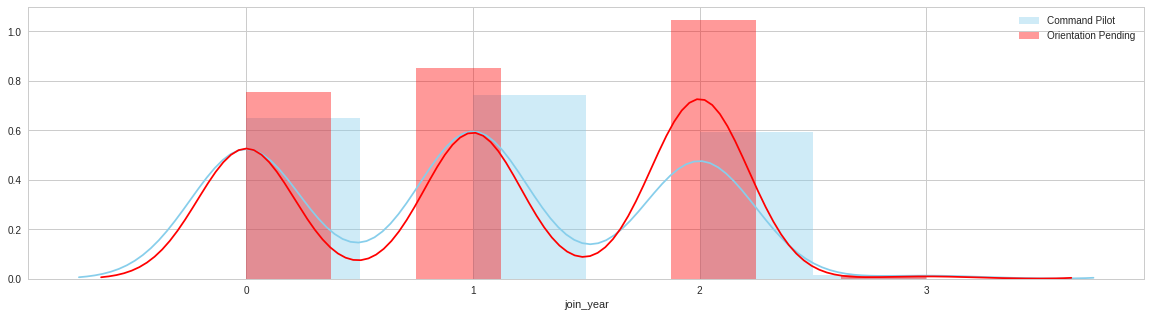

In [0]:
plt.subplots(figsize =(20, 5)) 
sns.distplot(df[CP]['join_year'] , color='skyblue', label='Command Pilot')
sns.distplot(df[OP]['join_year'] , color='red', label='Orientation Pending')
sns.plt.legend()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


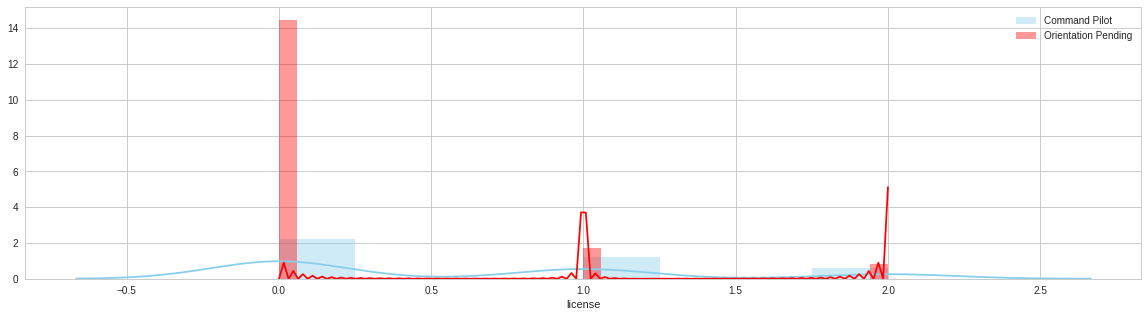

In [0]:
plt.subplots(figsize =(20, 5)) 
sns.distplot(df[CP]['license'] , color='skyblue', label='Command Pilot')
sns.distplot(df[OP]['license'] , color='red', label='Orientation Pending')
sns.plt.legend()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


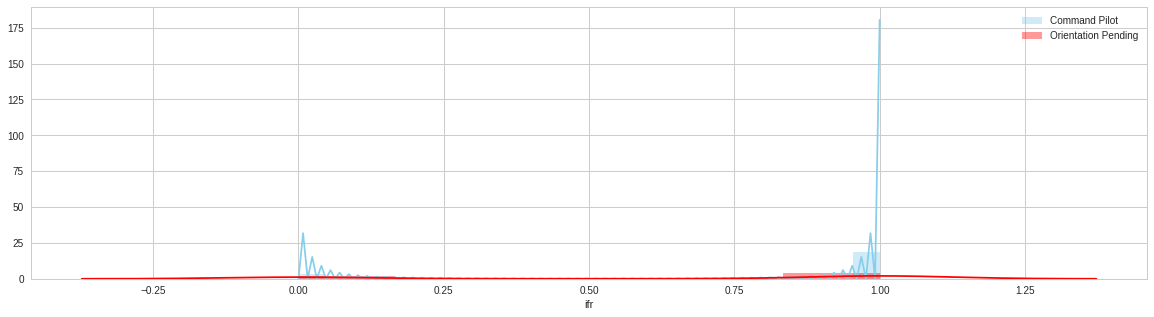

In [0]:
plt.subplots(figsize =(20, 5)) 
sns.distplot(df[CP]['ifr'] , color='skyblue', label='Command Pilot')
sns.distplot(df[OP]['ifr'] , color='red', label='Orientation Pending')
sns.plt.legend()

In [0]:
df.columns

Index(['join_year', 'flight_status', 'co_pilot', 'Age', 'total_hours',
       'license_type', 'ifr', 'multi_engine', 'oriented', 'license'],
      dtype='object')

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df[['join_year', 'co_pilot', 'Age', 'total_hours',
        'ifr', 'multi_engine', 'oriented', 'license']]))
MinMaxScaler(copy=True, feature_range=(0, 1))
#print(scaler.data_max_)
#print(scaler.transform(data))
#print(scaler.transform([[2, 2]]))

MinMaxScaler(copy=True, feature_range=(0, 1))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
import statsmodels.api as sm
cols = [ 'co_pilot', 'Age', 'total_hours', 'license', 'ifr', 'multi_engine']
y = df['oriented'].values 
X = df[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
logit_model=sm.Logit(df['oriented'],X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.616751
         Iterations 5
                         Results: Logit
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: oriented         Pseudo R-squared: -0.002   
Date:               2019-02-13 06:36 AIC:              2068.2473
No. Observations:   1667             BIC:              2100.7600
Df Model:           5                Log-Likelihood:   -1028.1  
Df Residuals:       1661             LL-Null:          -1026.6  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
co_pilot          0.1009   0.1892  0.5330 0.5941 -0.2700  0.4717
Age              -0.0186   0.0020 -9.2845 0.0000 -0.0225 -0.0147
total_hours       0.0000   0.0000  0.5670 0.5707 -0.0000  0.0000
license      

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.0374045 , 0.68010323, 0.83958391, 0.24936851]])

In [0]:
scores = cross_validate(logreg, X, y, cv=6)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

{'fit_time': array([0.02004766, 0.01020336, 0.01095033, 0.01075673, 0.01806593,
        0.0113194 ]),
 'score_time': array([0.00136662, 0.00129342, 0.00129914, 0.00126243, 0.00144958,
        0.00132895]),
 'test_score': array([0.71942446, 0.75899281, 0.74460432, 0.72302158, 0.77338129,
        0.70758123]),
 'train_score': array([0.75161987, 0.73290137, 0.74658027, 0.7487401 , 0.74226062,
        0.74892086])}

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
scores = cross_validate(clf, X, y, cv=6)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.01830554, 0.01836586, 0.01647067, 0.0161407 , 0.01644373,
        0.01707339]),
 'score_time': array([0.00235271, 0.00231814, 0.00229645, 0.0022881 , 0.00226283,
        0.00254083]),
 'test_score': array([0.67985612, 0.73381295, 0.71582734, 0.69064748, 0.71582734,
        0.71119134]),
 'train_score': array([0.80849532, 0.80273578, 0.81209503, 0.81353492, 0.80993521,
        0.81510791])}

In [0]:
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [0]:
list(zip(X, clf.feature_importances_))

[('Age', 0.6292166311752965),
 ('license', 0.18509149652072449),
 ('multi_engine', 0.1319840800781115),
 ('co_pilot', 0.053707792225867655)]

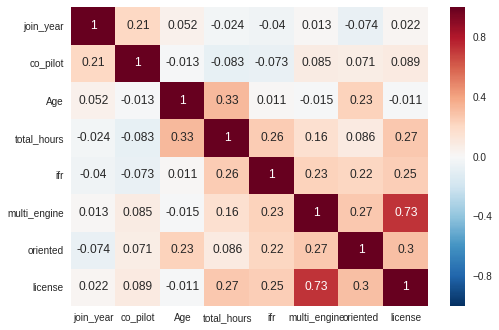

In [0]:
xcor = df.corr()
sns.heatmap(xcor, annot= True)

In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
#Common Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [0]:
#Define y veriable as target
y=['oriented']

#Define x variables
x=['co_pilot','Age','total_hours','license','ifr','multi_engine']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df[x],df[y], test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1333, 6) (1333, 1)
(334, 6) (334, 1)


In [0]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #xgboost: 
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y_train[y]

#index through MLA and save performance to table
row_index = 1
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg,x_train[x],  y_train[y], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions 
    alg.fit(x_train[x],  y_train[y])
    MLA_predict[MLA_name] = alg.predict(x_train[x])
    
    row_index+=1

#print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,QuadraticDiscriminantAnalysis,0.738298,0.73,0.0655553,0.00253737
4,GradientBoostingClassifier,0.864205,0.72825,0.0441227,0.0755396
11,BernoulliNB,0.738548,0.7265,0.0670149,0.00319321
19,LinearDiscriminantAnalysis,0.738548,0.726,0.057138,0.00350659
21,XGBClassifier,0.831539,0.72525,0.0422204,0.0299495
9,RidgeClassifierCV,0.735044,0.72525,0.0569655,0.00527029
7,LogisticRegressionCV,0.733667,0.72325,0.058869,0.202502
12,GaussianNB,0.714768,0.71875,0.0617783,0.00276477
1,AdaBoostClassifier,0.776345,0.71425,0.0391224,0.0723319
5,RandomForestClassifier,0.97597,0.7085,0.064709,0.0155183
